# **Information Gain of Twitter ‘Social Spambots’**
## By: Jason Weidner & Joaquin Quintana

## Each files number of entries. 

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
from zipfile import ZipFile
import seaborn as sns
import pandas as pd
import numpy as np
import os

# **Directory setup for this script**
# Schematic of folder structure expected for running this mining tool. 

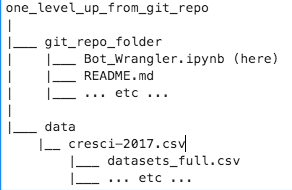

In [2]:
#placed image in folder with this python notebook for user to run and see prior to opening any files
Image(filename = 'Folder Structure Bot_Wrangler.png')

## **Begin Function Defintions for Notebook**

In [3]:
#Template for function defintions; Note: May consider making the whole directory a file path so all files are found regardless of location. 
def navigator():
    """Changes your current working directory to the one containing unziped data file.
    
    Parameters:
        attr_col (N/A): Navigates from the directory containing the python notebook up one leve to the 
        folder 'data'. This folder contains the zip file with the raw data. Simply run the function after 
        folders are in aforementioned stucture (see schematic above).
    
    Returns: 
        (string): Prints the working directory. The new path is added to the working directory.
        
    Note:
        - This function will change the working directory and keep the notebook on the path to the data
        folder. Allows for the notebook to access the data file remotely. 
    """
    path_parent = os.path.dirname(os.getcwd()) # get directory notebook 
    
    # move up one level and find folder Data 
    f = os.path.join(os.path.expanduser('~'),path_parent,'data')
    
    #add working filepath to working directory, this is will find the data folder and then start unzipping files
    os.chdir(f)
    return(f)

In [4]:
def unzip_all_zips(Zip_File_Name):
    """ Opens all zipfiles in the working directory and the subsequent sub directories. 
    
    Parameters:
        attr_col (string): input zip folder's name. For example, 'folderName.zip'
    
    Returns: 
        (string): Print "Done!" When finished opening files.
        
    Note:
        - This function will open all folders with ext .zip. 
        Warning! - function will overwrite all data with identical folder names 
    """
    # specifying the zip file name 
    folder = Zip_File_Name 
    
    # opening the zip file in READ mode 
    with ZipFile(folder, 'r') as zip:
        zip.extractall() 

    #navigate into subdirectory
    os.chdir('datasets_full.csv')
    path = os.getcwd()
    
    #get all files in subdirectory 
    all_files = os.listdir('.')
    all_zip_files = [file for file in all_files if file.endswith('.zip')] # find only the zip files
    
    #open all identified zip files in subdriectory
    for file in all_zip_files:
        with ZipFile(file, 'r') as zip: 
            zip.extractall() 
            
    return("Done!")

In [5]:
#probably unnecessary but could be useful for large files that have many columns of Nans and are slow to work with
def remove_NaNs(Pandas_DataFrame):
    """ Function take as Pandas DataFrame and removes all columns which are NaN. 
    
    Parameters: 
        attr_col (Pandas DataFrame): input pandas DataFrame 
        
    Returns: 
         (Pandas DataFrame): return Dataframe with all NaN columns removed.       
        
    Note: 
         
    """
    
    return Pandas_DataFrame.dropna(axis='columns')

In [6]:
#JQ
def get_columns_csv(csv_fileName, list_of_columns):   
    """ Function reads the csv_fileName of interest and pulls the requested columns from the file. 
    All columns requested are placed into a new Pandas DataFrame and returned with a name specified by the user. 
     
    
    Parameters: 
        attr_col (string): string of fileName, a list of strings containing requested columns.
        
    Returns: 
         (Pandas DataFrame): return a new Pandas DataFrame. The new Dataframe contains the columns requested.    
        
    Note: 
         
    """
    real_users = pd.read_csv(csv_fileName)
    
    return real_users[list_of_columns]

In [7]:
#JQ
def Info_Gain_Dataset(bot_flag_col, df):
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (String): The name of the column we want to use for calculating information gain
        bot_flag_col (String): The name of the column for bot_status (i.e. authentic user or bot)
        df (DataFrame): Df containing all the data
        
    
    Returns: 
        (np.float64): The information gain of attr_col in df.
        
    Note:
        - This function will call Info_gain_dataset in order to calculate info_gain_attribute.
    """
    # number of different attributes
    uniques = df[bot_flag_col].unique()
    m = len(uniques)

    n = df.shape[0]
    # See https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe

    #print("m:", m, "n:", n)

    #print(df[bot_flag_col].value_counts())

    # calculate probabilities for each class
    p_i = []
    for attr_count in df[bot_flag_col].value_counts().values.tolist():
        p_temp = attr_count / np.sum(df[bot_flag_col].value_counts().values)
        p_i.append(p_temp)
    #print("p_i:", p_i)

    # calculte individual entropies and sum
    I_D = 0
    for i in range(0,m):
        I_D += -p_i[i] * np.log2(p_i[i])
    #I_D
        
    return I_D

In [136]:
#JW
def Info_Gain_Attribute(attr_col, bot_flag_col, df):
    """ Returns the information gain of attr_col in the dataframe df.
    
    Parameters:
        attr_col (String): The name of the column we want to use for calculating information gain
        bot_flag_col (String): The name of the column for bot_status (i.e. authentic user or bot)
        df (DataFrame): Df containing all the data
        
    
    Returns: 
        (np.float64): The information gain of attr_col in df.
        
    Note:
        - This function will call Info_gain_dataset in order to calculate info_gain_attribute.
    """
    
    m = df[attr_col].values.tolist()
    m = list(set(m))
    #print("m:", m)

    result = []
    result_sum = 0

    for m in list(set(df[attr_col].values.tolist())):
        p = len(df[(df[bot_flag_col] == 1) & (df[attr_col] == m)].values.tolist())
        n = len(df[(df[bot_flag_col] == 0) & (df[attr_col] == m)].values.tolist())
        print(p,n)
        result.append(I(p,n))
        result_sum += I(p,n)
    # print(result)
    return result_sum

In [9]:
#JQ
def create_col_gt_30_followers(df):
    """Creates a df with two columns: "id" and 'followers_gt_30', which is 1 or 0 based on if the user have over 30 followers.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "followers_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and "followers_gt_30" with appropriate numerical boolean value.
    """
    data = df.assign(followers_gt_30=0) # create column of zeros named 'followers_gt_30'
    
    #assign 1's to column followers_gt_30 when followers_count > 30
    data.loc[data.followers_count > 30, 'followers_gt_30'] = 1
    
    #return new column with 0 and 1s given condition and the associated id.  
    data = data[['id', 'followers_gt_30']] 
    
    return data

In [10]:
#JQ
def create_col_gt_100_followers(df):
    """Creates a df with two columns: "id" and 'followers_gt_100', which is 1 or 0 based on if the user have over 100 followers.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "followers_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and "followers_gt_100" with appropriate numerical boolean value.
    """
    data = df.assign(followers_gt_100 = 0) # create column of zeros named 'followers_gt_100'
    data.loc[data.followers_count > 100, 'followers_gt_100'] = 1
    data = data[['id', 'followers_gt_100']]
    
    return data

In [11]:
#JQ 
#friends_count: The number of users this account is following (AKA their “followings”). Under certain conditions of duress, 
# this field will temporarily indicate “0”.
def create_col_user_follows_gt_30(df):
    """Creates a df with two columns: "id" and boolean indicating if user follows over 30 other accounts.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "friends_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and a boolean value for if following count > 30.
    """
    data = df.assign(follows_gt_30 = 0) # create column of zeros named 'followers_gt_30'
    data.loc[data.friends_count > 30, 'follows_gt_30'] = 1
    data = data[['id', 'follows_gt_30']]
    
    return data

In [12]:
#JW
def create_col_user_follows_gt_100(df):
    """Creates a df with two columns: "id" and boolean indicating if user follows over 100 other accounts.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "friends_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if following count > 100.
    """
    data = df.assign(follows_gt_100 = 0) # create column of zeros named 'followers_gt_100'
    data.loc[data.friends_count > 100, 'follows_gt_100'] = 1
    data = data[['id', 'follows_gt_100']]

    return data

In [13]:
#JQ
def create_col_user_authored_over_50_tweets(df):
    """Creates a df with two columns: "id" and boolean indicating if user authored over 50 tweets.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "statuses_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and a boolean value for if user has authored > 50 tweets (includes retweeets).
    """
    # statuses_count: The number of Tweets (including retweets) issued by the user.
    # new column for storage authored_gt_50_tweets
    
    data = df.assign(authored_gt_50_tweets = 0) # create column of zeros named 
    data.loc[data.statuses_count > 50, 'authored_gt_50_tweets'] = 1
    data = data[['id', 'authored_gt_50_tweets']]

    return data

In [14]:
#JW
def create_col_user_authored_over_1000_tweets(df):
    """Creates a df with two columns: "id" and boolean indicating if user authored over 1000 tweets.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "id" and "tweets"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and a boolean value for if user has authored > 1000 tweets.
    """
        
    data = df.assign(authored_gt_1000_tweets = 0) # create column of zeros named 
    data.loc[data.statuses_count > 1000, 'authored_gt_1000_tweets'] = 1
    data = data[['id', 'authored_gt_1000_tweets']]

    return data

In [15]:
#JW
def create_col_has_default_image_in_profile(df):
    """Creates a df with two columns: usid and default_profile.
    
    Parameters:
        df (pd.df): a dataframe with at least two columns: "usid" and "default_profile"
        
    Returns:
        df (pd.df): a dataframe with two columns: "usid" and a boolean value for if user has a default_profile.
        
    Note: See https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user for a description of the default_profile attribute.
    """
    return 

In [16]:
#JQ
# friends_count: The number of users this account is following (AKA their “followings” or "friends").
# followers_count: how many users follow this user (AKA followers).
def frame_friends_square_followers_ratio(df):
    """Creates a df with two columns: "id" and the computed ratios for (friends) / (followers^2) as a float.
    
    Parameters:
        df (pd.df): a dataframe with at least three columns: "id" and "friends_count", "followers_count"
        
    Returns:
        df (pd.df): a dataframe with two columns: "id" and ratios for (friends) / (followers^2) as a float.
    """
    #columns you want to pull from csv file 
    list_of_columns = ['id','friends_count','followers_count']

    #return pandas dataframe with select columns. 
    df_select_col = df[list_of_columns]
    
    #compute friends/followers^2 ratio
    friends_followers_ratio = df_select_col.friends_count/df_select_col.followers_count**2
    
    #drop columns which are no longer needed
    df_select_col = df_select_col.drop(['friends_count', 'followers_count'], axis=1)
    
    #create new column to place ratio
    df_select_col['friends/followers^2'] = friends_followers_ratio
    
    #return the data frame with "id" and "friends/followers^2"
    return df_select_col

In [17]:
# save DF as filname
def save_df_as_filename(df, fn):
    """Saves the dataframe as filename fn.
    
    Parameters:
        df (pd.dataframe): A pandas dataframe containing data that will be saved to file.
        fn(String): The filename to use to save the df to file.
        
    Returns:
        N/A
    """
    df.to_csv(fn, index=False)

In [18]:
def PuppetMaster():
    """Manages subfunctions, creates the output numbers
    
    Parameters:
        None
        
    Returns:
        prints results
    """
#1 get authentic user id's
#2 get tradtional spam bot users id's
#3 append column call bot or not. 
#4 compute Info_gain dataset
#5 create column for each follower count, following count, friend count, default_image and tweet count. 
#6 pass 5 to respective functions to get the calculated columns. 
#7 pass 6 to attribute Info_gain to get all 7 attributes information gain. 
#8 print to screen and results to DataFrame

In [180]:
def I(p,n):
    tot = p + n
    if(p == 0):
        first_term = 0
    else:
        first_term = -(p/tot) * np.log2(p/tot)
    
    if(n == 0):
        second_term = 0
    else:
        second_term = -(n/tot) * np.log2(n/tot)
    
    return first_term + second_term

### 1. Use navigator and  then run the function unzip_all_zips. 

### 2. This will open all zip files and any file can be accessed by placing the filePath after os.getcwd(), this is as a string.

#### **Note:** Navigator assumes your starting with the raw unzipped file each time. 

In [20]:
#find data folder and to path
navigator()

'/Users/JQ/Documents/Data_Mine/Bots_Project/data'

In [21]:
#unzip all files with the zip ext. Add to file Path
unzip_all_zips('cresci-2017.csv.zip')

'Done!'

### Constants to make things easy to access all files after unzipping files. 

In [22]:
#After running bnavigator and unzipping files we can use the following constants to find all csv files on file path
REAL_USERS = os.getcwd() + '/genuine_accounts.csv/users.csv'
REAL_TWEETS = os.getcwd() + '/genuine_accounts.csv/tweets.csv'

SOCIAL_USERS_1 = os.getcwd() + '/social_spambots_1.csv/users.csv'
SOCIAL_USERS_2 = os.getcwd() + '/social_spambots_2.csv/users.csv'
SOCIAL_USERS_3 = os.getcwd() + '/social_spambots_3.csv/users.csv'

SOCIAL_TWEETS_1 = os.getcwd() + '/social_spambots_1.csv/tweets.csv'
SOCIAL_TWEETS_2 = os.getcwd() + '/social_spambots_2.csv/tweets.csv'
SOCIAL_TWEETS_3 = os.getcwd() + '/social_spambots_3.csv/tweets.csv'

TRAD_USERS_1 = os.getcwd() + '/traditional_spambots_1.csv/users.csv'
TRAD_USERS_2 = os.getcwd() + '/traditional_spambots_2.csv/users.csv'
TRAD_USERS_3 = os.getcwd() + '/traditional_spambots_3.csv/users.csv'
TRAD_USERS_4 = os.getcwd() + '/traditional_spambots_4.csv/users.csv'

TRAD_TWEETS_1 = os.getcwd() + '/traditional_spambots_1.csv/tweets.csv'
TRAD_TWEETS_2 = os.getcwd() + '/traditional_spambots_2.csv/tweets.csv'
TRAD_TWEETS_3 = os.getcwd() + '/traditional_spambots_3.csv/tweets.csv'
TRAD_TWEETS_4 = os.getcwd() + '/traditional_spambots_4.csv/tweets.csv'

In [23]:
# unzip folders and rename files/folders appropriately
# For traditional spambots:
#    read spambot file - get usid, 

## read in a few files

In [23]:
real_users = pd.read_csv(REAL_USERS)
real_tweets = pd.read_csv(REAL_TWEETS)

tradbot_1 = pd.read_csv(TRAD_USERS_1)
tradbot_2 = pd.read_csv(TRAD_USERS_2)
tradbot_3 = pd.read_csv(TRAD_USERS_3)
tradbot_4 = pd.read_csv(TRAD_USERS_4)

socbots_1 = pd.read_csv(SOCIAL_USERS_1)
socbots_2 = pd.read_csv(SOCIAL_USERS_2)
socbots_3 = pd.read_csv(SOCIAL_USERS_3)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Determine the number of entries per file. Just for files concerning the users not tweets. 

In [24]:
l = [real_users,tradbot_1,tradbot_2,tradbot_3,tradbot_4,socbots_1,socbots_2,socbots_3]
size = []
#get the number of rows in each file
for name in l:
    size.append(name.id.shape[0])
    
#place x labels and convert to Dataframe
labels = ['real_users','tradbot_1','tradbot_2','tradbot_3','tradbot_4','socbots_1','socbots_2','socbots_3']
dat = pd.DataFrame(size,labels)

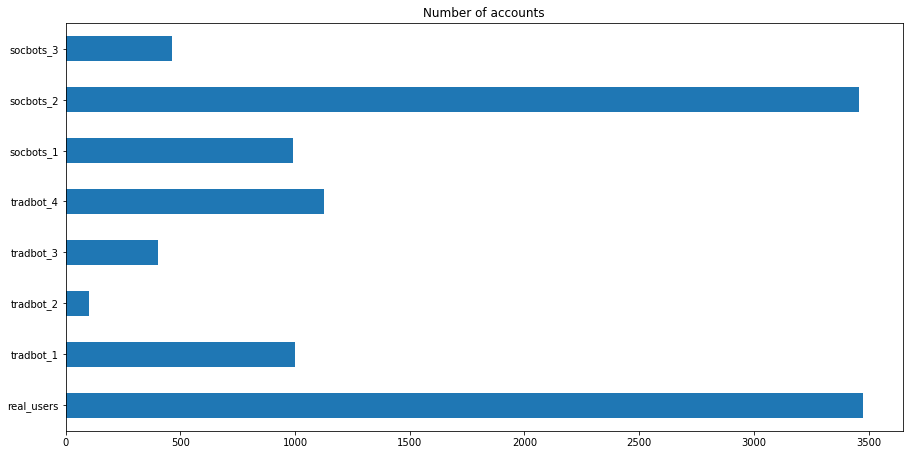

In [25]:
#plot bar chart showing the sizes of each file
dat.plot.barh(legend=False,figsize=(15,7.5));
plt.title('Number of accounts');

In [26]:
real_users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,...,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,test_set_1,test_set_2
count,3.474000e+03,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,1032.0,13.0,2155.0,3084.0,...,2475.000000,1.0,0.0,78.0,11.0,0.0,0.0,0.0,3474.000000,3474.000000
mean,9.519675e+08,16958.220207,1393.219632,633.242372,4669.620322,19.496546,1.0,1.0,1.0,1.0,...,-4386.545455,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.287853,0.141048
std,9.942397e+08,30696.286104,17216.664524,1600.962972,11527.566663,157.740969,0.0,0.0,0.0,0.0,...,22486.293337,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.452827,0.348121
min,6.780330e+05,3.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,-39600.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
25%,1.475541e+08,1810.250000,149.000000,169.000000,261.250000,0.000000,1.0,1.0,1.0,1.0,...,-25200.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
50%,4.751671e+08,6609.000000,341.000000,319.000000,1286.000000,2.000000,1.0,1.0,1.0,1.0,...,-14400.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000
75%,1.655303e+09,19467.000000,803.750000,635.750000,4727.000000,8.000000,1.0,1.0,1.0,1.0,...,18000.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,0.000000
max,3.164942e+09,399555.000000,986837.000000,46310.000000,313954.000000,6166.000000,1.0,1.0,1.0,1.0,...,46800.000000,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000


In [27]:
real_tweets.describe()

,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,geo,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions
count,2.839361e+06,0.0,2.839361e+06,2.839361e+06,2.839361e+06,0.0,0.0,2.839361e+06,2839361.0,2.839361e+06,0.0,0.0,17686.0,2.839361e+06,2.839361e+06,2.839361e+06
mean,6.913012e+08,NaN,1.357797e+17,2.049461e+08,1.361281e+17,NaN,NaN,8.411514e+02,0.0,4.657104e-01,NaN,NaN,1.0,2.476931e-01,1.507469e-01,7.714422e-01
std,8.170510e+08,NaN,2.327207e+17,5.709004e+08,2.342648e+17,NaN,NaN,1.669803e+04,0.0,5.891934e+00,NaN,NaN,0.0,7.314669e-01,3.659809e-01,8.773255e-01
min,6.780330e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.697050e+07,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.364496e+08,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,1.000000e+00
75%,6.133457e+08,NaN,3.086028e+17,2.476506e+07,3.054094e+17,NaN,NaN,1.000000e+00,0.0,0.000000e+00,NaN,NaN,1.0,0.000000e+00,0.000000e+00,1.000000e+00
max,2.356426e+09,NaN,5.941393e+17,3.224944e+09,5.941401e+17,NaN,NaN,3.350111e+06,0.0,4.278000e+03,NaN,NaN,1.0,2.800000e+01,5.000000e+00,1.900000e+01


Note: real_tweets has ~2.8M rows. It takes a little while to read the data from CSV into a pd.df

In [28]:
tradbot_1.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,default_profile,default_profile_image,...,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.581095e+07,220.829000,637.297000,1326.542000,4.328000,7.900000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.242864e+07,1402.942102,2096.491834,1824.098999,101.931106,96.959596,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.248952e+06,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.141044e+07,2.000000,96.000000,593.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.215063e+07,16.000000,198.500000,956.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.803460e+07,69.000000,637.250000,1833.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.209203e+08,34402.000000,40368.000000,34504.000000,3200.000000,2858.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
socbots_1.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,test_set_1
count,9.910000e+02,991.000000,991.000000,991.000000,991.000000,991.000000,145.0,1.0,18.0,988.0,266.0,903.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,991.0
mean,6.490490e+08,1111.998991,1784.907164,1853.768920,158.171544,3.954591,1.0,1.0,1.0,1.0,1.0,10453.156146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,4.812682e+08,5740.506607,3217.001658,3111.163974,2160.885086,23.658149,0.0,NaN,0.0,0.0,0.0,2139.608649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,2.485829e+07,5.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-25200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,4.662803e+08,83.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,4.671212e+08,138.000000,234.000000,313.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,5.422122e+08,414.500000,3841.500000,4087.500000,0.000000,4.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
max,2.525273e+09,106283.000000,48787.000000,45690.000000,50699.000000,656.000000,1.0,1.0,1.0,1.0,1.0,10800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Traditional Spambot Analysis

## Information Gain for Total Dataset

The original data has divided bot and non-bot data. We need to combine them to calculate the total information (i.e. entropy) for the dataset.

In [30]:
data = real_users
data = data.assign(bot=0) # create column of zeros named 'bot'
real_users_only = data[['id', 'bot']] # create a dataframe that is only the columns 'id' and 'bot'
real_users_only # show data

,id,bot
0,1502026416,0
1,2492782375,0
2,293212315,0
3,191839658,0
4,3020965143,0
...,...,...
3469,205218909,0
3470,2874966164,0
3471,2980901837,0
3472,121122678,0


In [31]:
data = tradbot_1
data = data.assign(bot=1) # create column of ones named 'bot'
trad_Bot_users_only = data[['id', 'bot']] #create df with columns 'id' and 'bot'
trad_Bot_users_only # show data

,id,bot
0,7248952,1
1,7732472,1
2,9524952,1
3,10788822,1
4,14596967,1
...,...,...
995,117166638,1
996,117281140,1
997,117318786,1
998,117320084,1


In [32]:
real_users_and_trad_bot = pd.concat([trad_Bot_users_only, real_users_only], axis=0) # concat df's, one on top of the other
real_users_and_trad_bot.set_index(keys="id")

,bot
id,
7248952,1
7732472,1
9524952,1
10788822,1
14596967,1
...,...
205218909,0
2874966164,0
2980901837,0


In [33]:
ID_tradbots = Info_Gain_Dataset("bot", real_users_and_trad_bot) # returns the information for the entire dataset
print("Total information for the traditional bots dataset is:", ID_tradbots)

Total information for the traditional bots dataset is: 0.7665315957882222


### Rule: Follower count >30

In [34]:
data_real = real_users_and_trad_bot
data_real

,id,bot
0,7248952,1
1,7732472,1
2,9524952,1
3,10788822,1
4,14596967,1
...,...,...
3469,205218909,0
3470,2874966164,0
3471,2980901837,0
3472,121122678,0


In [35]:
gt_30_followers_bots = create_col_gt_30_followers(tradbot_1)
gt_30_followers_real = create_col_gt_30_followers(real_users)

gt_30_f_data = pd.concat([gt_30_followers_bots,gt_30_followers_real], axis=0)

In [36]:
gt_30_f_total = pd.merge(gt_30_f_data, data_real, left_on='id', right_on='id')
gt_30_f_total

,id,followers_gt_30,bot
0,7248952,1,1
1,7732472,1,1
2,9524952,1,1
3,10788822,1,1
4,14596967,1,1
...,...,...,...
4469,205218909,1,0
4470,2874966164,1,0
4471,2980901837,0,0
4472,121122678,1,0


In [37]:
I_A = Info_Gain_Attribute("followers_gt_30", "bot", gt_30_f_total)

In [38]:
I_A

0.7984162052134601

### Rule: Follower count > 100

In [39]:
gt_100_followers_bots = create_col_gt_100_followers(tradbot_1)
gt_100_followers_real = create_col_gt_100_followers(real_users)

gt_100_f_data = pd.concat([gt_100_followers_bots,gt_100_followers_real], axis=0)
gt_100_f_total = pd.merge(gt_100_f_data, data_real, left_on='id', right_on='id')
gt_100_f_total

,id,followers_gt_100,bot
0,7248952,1,1
1,7732472,1,1
2,9524952,1,1
3,10788822,1,1
4,14596967,1,1
...,...,...,...
4469,205218909,0,0
4470,2874966164,1,0
4471,2980901837,0,0
4472,121122678,0,0


In [40]:
I_A_followers_GT_100 = Info_Gain_Attribute("followers_gt_100", "bot", gt_100_f_total)
I_A_followers_GT_100

0.9903262388991112

# compute friends/followers^2

In [41]:
#compute friends to follower ratio for real users and traditional bots.
real_ratio = frame_friends_square_followers_ratio(real_users)
bot_ratio = frame_friends_square_followers_ratio(tradbot_1)

In [42]:
# concatenate real users and traditional bots after computing compute friends to follower ratio
ratio_data = pd.concat([real_ratio,bot_ratio], axis=0) 
ratio_data

,id,friends/followers^2
0,1502026416,0.007674
1,2492782375,0.004454
2,293212315,0.006423
3,191839658,0.000194
4,3020965143,0.179138
...,...,...
995,117166638,0.046009
996,117281140,0.001980
997,117318786,0.000216
998,117320084,0.000312


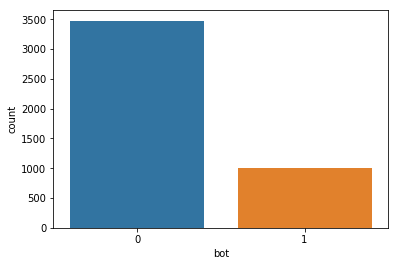

In [43]:
#datasets seem to be unbalanced between real users and bots.
ratio_total = pd.merge(ratio_data, data_real, left_on='id', right_on='id') #merge files and use id for identifcation. 
sns.countplot(x="bot", data=ratio_total);

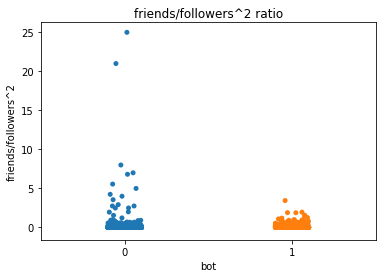

In [44]:
ax = sns.stripplot(x="bot", y="friends/followers^2", data=ratio_total)
plt.title('friends/followers^2 ratio');

# Authored_over_50_tweets & Authored_over_1000_tweets

In [45]:
create_col_user_authored_over_50_tweets(real_users)

,id,authored_gt_50_tweets
0,1502026416,1
1,2492782375,1
2,293212315,1
3,191839658,1
4,3020965143,1
...,...,...
3469,205218909,1
3470,2874966164,1
3471,2980901837,1
3472,121122678,1


In [47]:
create_col_user_authored_over_1000_tweets(socbots_1)

,id,authored_gt_1000_tweets
0,24858289,1
1,33212890,1
2,39773427,1
3,57007623,1
4,63258466,1
...,...,...
986,2286273170,0
987,2287318956,0
988,2290264806,0
989,2398910547,0


# Use this function to pull columns you want from the csv file; may be unecessary as functions are implemented.

In [48]:
#columns you want to pull from csv file; may be unecessary as functions are implemented.
list_of_columns = ['followers_count','following']

#return pandas datafream with columns. 
real_users_select_col = get_columns_csv(REAL_USERS, list_of_columns)

real_users_select_col.head()

,followers_count,following
0,208,NaN
1,330,NaN
2,166,NaN
3,2248,NaN
4,21,NaN


### Drop columns that containg only Nans; may be unecessary as functions are implemented.

In [49]:
real_users_select_col = remove_NaNs(real_users_select_col)
real_users_select_col

,followers_count
0,208
1,330
2,166
3,2248
4,21
...,...
3469,94
3470,5378
3471,18
3472,41


In [186]:
gt_30_f_total

,id,followers_gt_30,bot
0,7248952,1,1
1,7732472,1,1
2,9524952,1,1
3,10788822,1,1
4,14596967,1,1
...,...,...,...
4469,205218909,1,0
4470,2874966164,1,0
4471,2980901837,0,0
4472,121122678,1,0


In [187]:
#test functions 
ID_tradbots = Info_Gain_Dataset("bot", gt_30_f_total) # returns the information for the entire dataset
print("Total information for the traditional bots dataset is:", ID_tradbots)

ID_tradbots

Total information for the traditional bots dataset is: 0.7665315957882222


0.7665315957882222

In [188]:
I_A = Info_Gain_Attribute("followers_gt_30", "bot", gt_30_f_total)
I_A

18 184
982 3290


1.2112711842052422

In [189]:
Gain_for_attribute = ID_tradbots - I_A
Gain_for_attribute

-0.44473958841702

In [168]:
sum(SAMPLE_gt_30_f_total.bot == 1)

3

In [169]:
sum(SAMPLE_gt_30_f_total.bot == 0)

7

In [170]:
sum(SAMPLE_gt_30_f_total.followers_gt_30 == 1)

9

In [171]:
sum(SAMPLE_gt_30_f_total.followers_gt_30 == 0)

1